<a href="https://colab.research.google.com/github/aryannewyork/Machine-Learning-Algorithms/blob/master/CVXOPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix as cvxoptMatrix
from cvxopt import solvers as cvxoptSolvers

In [ ]:
plt.style.use('classic')
N = 100
X, y = make_blobs(n_samples=N, random_state=1, centers=2, n_features=5)
y[y == 0] = -1

(100, 5)
(100,)


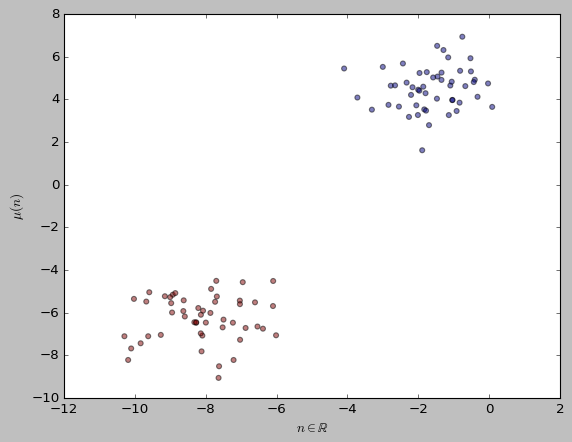

In [ ]:
plt.xlabel('$n \in \mathbb{R}$')
plt.ylabel('$\mu(n)$')
print(np.shape(X))
print(np.shape(y))
plt.scatter(X.T[0], X.T[1], c=y+1, alpha=.5)

In [ ]:
y = y.reshape(-1, 1)*1.
# gives a -ve identity matrix of size (NxN)
G = cvxoptMatrix(-np.eye(N))
h = cvxoptMatrix(np.zeros(N))
q = cvxoptMatrix(-np.ones((N, 1)))
# reshaping y is done to transpose it, -1 means number of elements in y (easier representaion)
A = cvxoptMatrix(y.reshape(1, -1))
b = cvxoptMatrix(np.zeros(1))
# y = y.reshape(-1, 1)
print(y.shape,X.shape)
H = np.dot((y*X), (y*X).T)
P = cvxoptMatrix(H)

(100, 1) (100, 5)


In [ ]:
sol = cvxoptSolvers.qp(P, q, G, h, A, b)
print(sol)
alphas = sol['x']
print(np.array(sol['x']).shape)

     pcost       dcost       gap    pres   dres
 0: -1.2040e+00 -1.6810e+00  2e+02  1e+01  1e+00
 1: -2.0466e-01 -5.8404e-02  8e+00  5e-01  6e-02
 2: -4.6654e-03 -4.3364e-02  3e-01  2e-02  2e-03
 3: -1.5337e-03 -3.2089e-02  3e-02  2e-18  6e-16
 4: -9.1549e-03 -1.6152e-02  7e-03  3e-18  4e-16
 5: -1.2353e-02 -1.6858e-02  5e-03  5e-18  3e-16
 6: -1.4972e-02 -1.5336e-02  4e-04  2e-18  5e-16
 7: -1.5299e-02 -1.5305e-02  5e-06  2e-18  5e-16
 8: -1.5304e-02 -1.5304e-02  5e-08  3e-18  5e-16
Optimal solution found.
{'x': <100x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <100x1 matrix, tc='d'>, 'z': <100x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 5.277613462738729e-08, 'relative gap': 3.4484784816522216e-06, 'primal objective': -0.015304179773249271, 'dual objective': -0.015304232549383899, 'primal infeasibility': 3.469447199089929e-18, 'dual infeasibility': 5.462922922259467e-16, 'primal slack': 4.2776483832423267e-10, 'dual slack': 8.095995597515483e-08, 'iterations': 8}
(100, 1)


In [ ]:
w = ((y*alphas).T)@X
# print(w.shape, X[0].reshape(-1, 1).shape)
maxEl = np.max(alphas)
maxElInd = list(alphas).index(maxEl)
# print(maxElInd)
bias = y[maxElInd]-(w @ X[maxElInd].reshape(-1, 1))
print(bias)
print(sol['y'])

[[0.46865145]]
[ 4.69e-01]

